# Importing Libraries

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing Data

In [396]:
train_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/countrytrainmini.csv')

In [397]:
test_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/countrytest.csv')

In [398]:
train_df = train_df.drop(['Capital', 'Code'], axis=1)
train_df

,Country,Latitude,Longitude,Continent
0,Austria,48.200000,16.366667,Europe
1,Denmark,55.666667,12.583333,Europe
2,Finland,60.166667,24.933333,Europe
3,France,48.866667,2.333333,Europe
4,Australia,-35.266667,149.133333,Australia
5,Cocos Islands,-12.166667,96.833333,Australia
6,New Zealand,-41.300000,174.783333,Australia
7,Norfolk Island,-29.050000,167.966667,Australia
8,Bangladesh,23.716667,90.400000,Asia
9,Bhutan,27.466667,89.633333,Asia


In [399]:
def add_data(country, lat, long, continent):
    train_df.loc[len(train_df.index)] = [country, lat, long, continent]
    

In [400]:
#add_data('Hungary', 47.1625, 19.5033, 'Europe')
#add_data('Belarus', 53.7098, 27.9534, 'Europe')
#add_data('Switzerland', 46.8182, 8.2275, 'Europe')
#add_data('Germany', 51.1657, 10.4515, 'Europe')
#add_data('United Kingdom', 55.3781, 3.4360, 'Europe')
#add_data('Italy', 41.8719, 12.5674, 'Europe')
add_data('Slovakia', 48.6690, 19.6990, 'Europe')
add_data('Norway', 60.4720, 8.4689, 'Europe')
add_data('Greece', 39.0742, 21.8243, 'Europe')
add_data('Sweden', 60.1282, 18.6435, 'Europe')


In [401]:

add_data('Fiji', -17.7134, 178.0650, 'Australia')
add_data('Solomon Islands', -9.6457, 160.1562, 'Australia')
add_data('Papua New Guinea', -6.3150, 143.9555, 'Australia')
add_data('Marshall Islands', 7.1315, 171.1845, 'Australia')
#add_data('Palau', 7.5150, 134.5825, 'Australia')
#add_data('Guam', 13.4443, 144.7937, 'Australia')
#add_data('Nauru', -0.5228, 166.9315, 'Australia')
#add_data('Tuvalu', -7.1095, 177.6493, 'Australia')


In [402]:

add_data('South Korea', 35.9078, 127.7669, 'Asia')
add_data('North Korea', 40.3399, 127.5101, 'Asia')
add_data('Vietnam', 14.0583, 108.2772, 'Asia')
add_data('Iran', 32.4279, 53.6880, 'Asia')
#add_data('Thailand', 15.8700, 100.9925, 'Asia')
#add_data('Japan', 36.2048, 138.2529, 'Asia')
#add_data('HongKong', 22.3193, 114.1694, 'Asia')
#add_data('Philippines', 12.8797, 121.7740, 'Asia')
#add_data('Sri Lanka', 7.8731, 80.7718, 'Asia')
#add_data('Nepal', 28.3949, 84.1240, 'Asia')
#add_data('Yemen', 15.5527, 48.5164, 'Asia')
#add_data('Mongolia', 46.8625, 103.8467, 'Asia')


In [403]:
train_df

,Country,Latitude,Longitude,Continent
0,Austria,48.200000,16.366667,Europe
1,Denmark,55.666667,12.583333,Europe
2,Finland,60.166667,24.933333,Europe
3,France,48.866667,2.333333,Europe
4,Australia,-35.266667,149.133333,Australia
5,Cocos Islands,-12.166667,96.833333,Australia
6,New Zealand,-41.300000,174.783333,Australia
7,Norfolk Island,-29.050000,167.966667,Australia
8,Bangladesh,23.716667,90.400000,Asia
9,Bhutan,27.466667,89.633333,Asia


# Data Visualization

C:\Users\kimta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Continents')

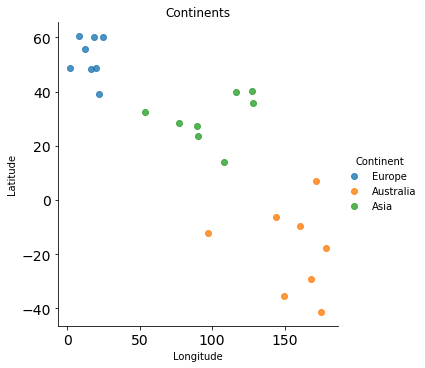

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('Longitude', 'Latitude', data=train_df, fit_reg=False, hue="Continent")

plt.title('Continents')

# Splitting Data

In [405]:
X_train = train_df[['Longitude', 'Latitude']]
y_train = train_df[['Continent']]

X_test = test_df[['Longitude', 'Latitude']]
y_test = test_df[['Continent']]

# Run a Tree-Decision ML

In [406]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Define a Shading Region Function

In [407]:
def display_decision_surface(clf,X, y):
    
    x_min = X.Longitude.min() - 5
    x_max = X.Longitude.max() + 5
    y_min = X.Latitude.min() - 5
    y_max = X.Latitude.max() + 5
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].Longitude, 
                    X.loc[idx].Latitude, 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
    plt.xlabel('Longitude',fontsize=16)
    plt.ylabel('Latitude',fontsize=16)
    plt.rcParams["figure.figsize"] = [10,10]
    plt.rcParams["font.size"] = 14
    plt.rcParams["xtick.labelsize"] = 14
    plt.rcParams["ytick.labelsize"] = 14
    plt.show()

C:\Users\kimta\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


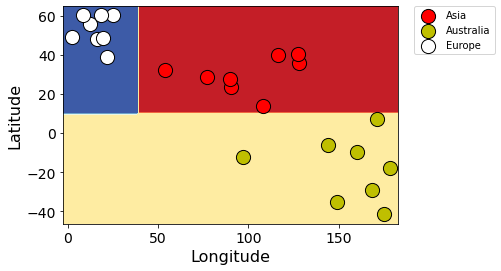

In [408]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
clf = tree.DecisionTreeClassifier().fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)

# Visualizing Decision Tree

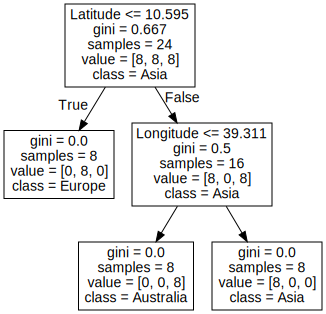

In [409]:
import graphviz
dot_data = tree.export_graphviz(clf, 
                         feature_names=['Longitude','Latitude'],  
                         class_names=['Asia', 'Europe', 'Australia'],)  
                      
graph = graphviz.Source(dot_data)  
graph

# Model Testing

In [410]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [411]:
print(f"accuracy score is {accuracy_score(y_test.values.ravel(),le.classes_[pred]):.3f}")

accuracy score is 0.931


In [412]:
comparison = pd.DataFrame({'prediction':le.classes_[pred],
                           'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,Europe,Europe
1,Europe,Europe
2,Europe,Europe
3,Europe,Europe
4,Europe,Europe
5,Europe,Europe
6,Europe,Europe
7,Europe,Europe
8,Europe,Europe
9,Europe,Europe
